In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

***As the last column(Unnamed: 32) is filled with NaN values, we will drop it.***

In [5]:
data = data.drop(["Unnamed: 32"], axis=1)

In [6]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data_id = data["id"]
data_id = pd.DataFrame(data_id, columns = ["id"])  #Saving IDs in a separate Dataframe
data.drop(["id"],axis=1, inplace=True)   #Dropping id from data

In [8]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

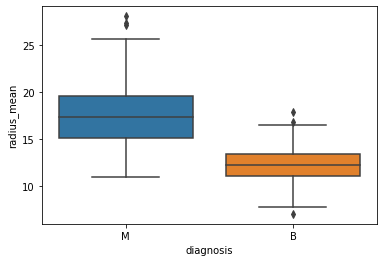

In [9]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="radius_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

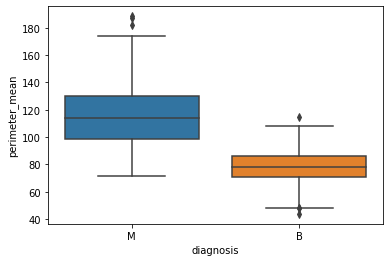

In [10]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="perimeter_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

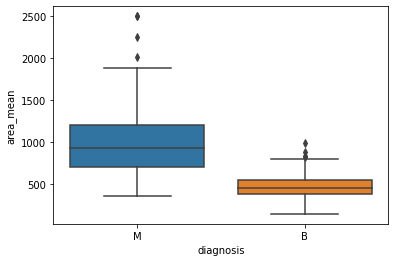

In [11]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="area_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

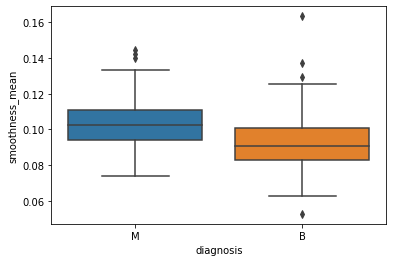

In [12]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="smoothness_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

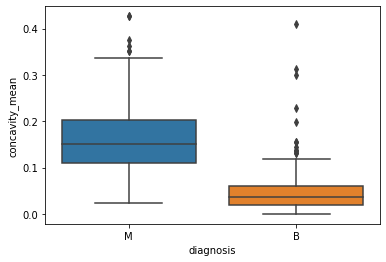

In [13]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="concavity_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='symmetry_mean'>

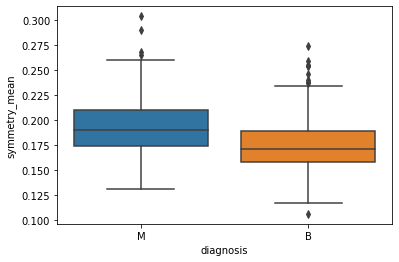

In [14]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="symmetry_mean", data=data, ax=axes)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_mean'>

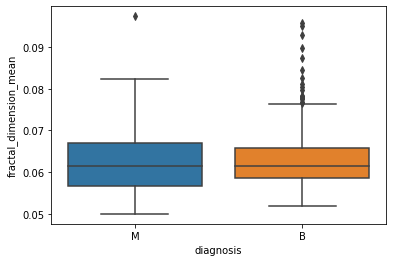

In [15]:
_, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data, ax=axes)

In [16]:
d = {"B":0, "M":1}
data["diagnosis"] = data["diagnosis"].map(d)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


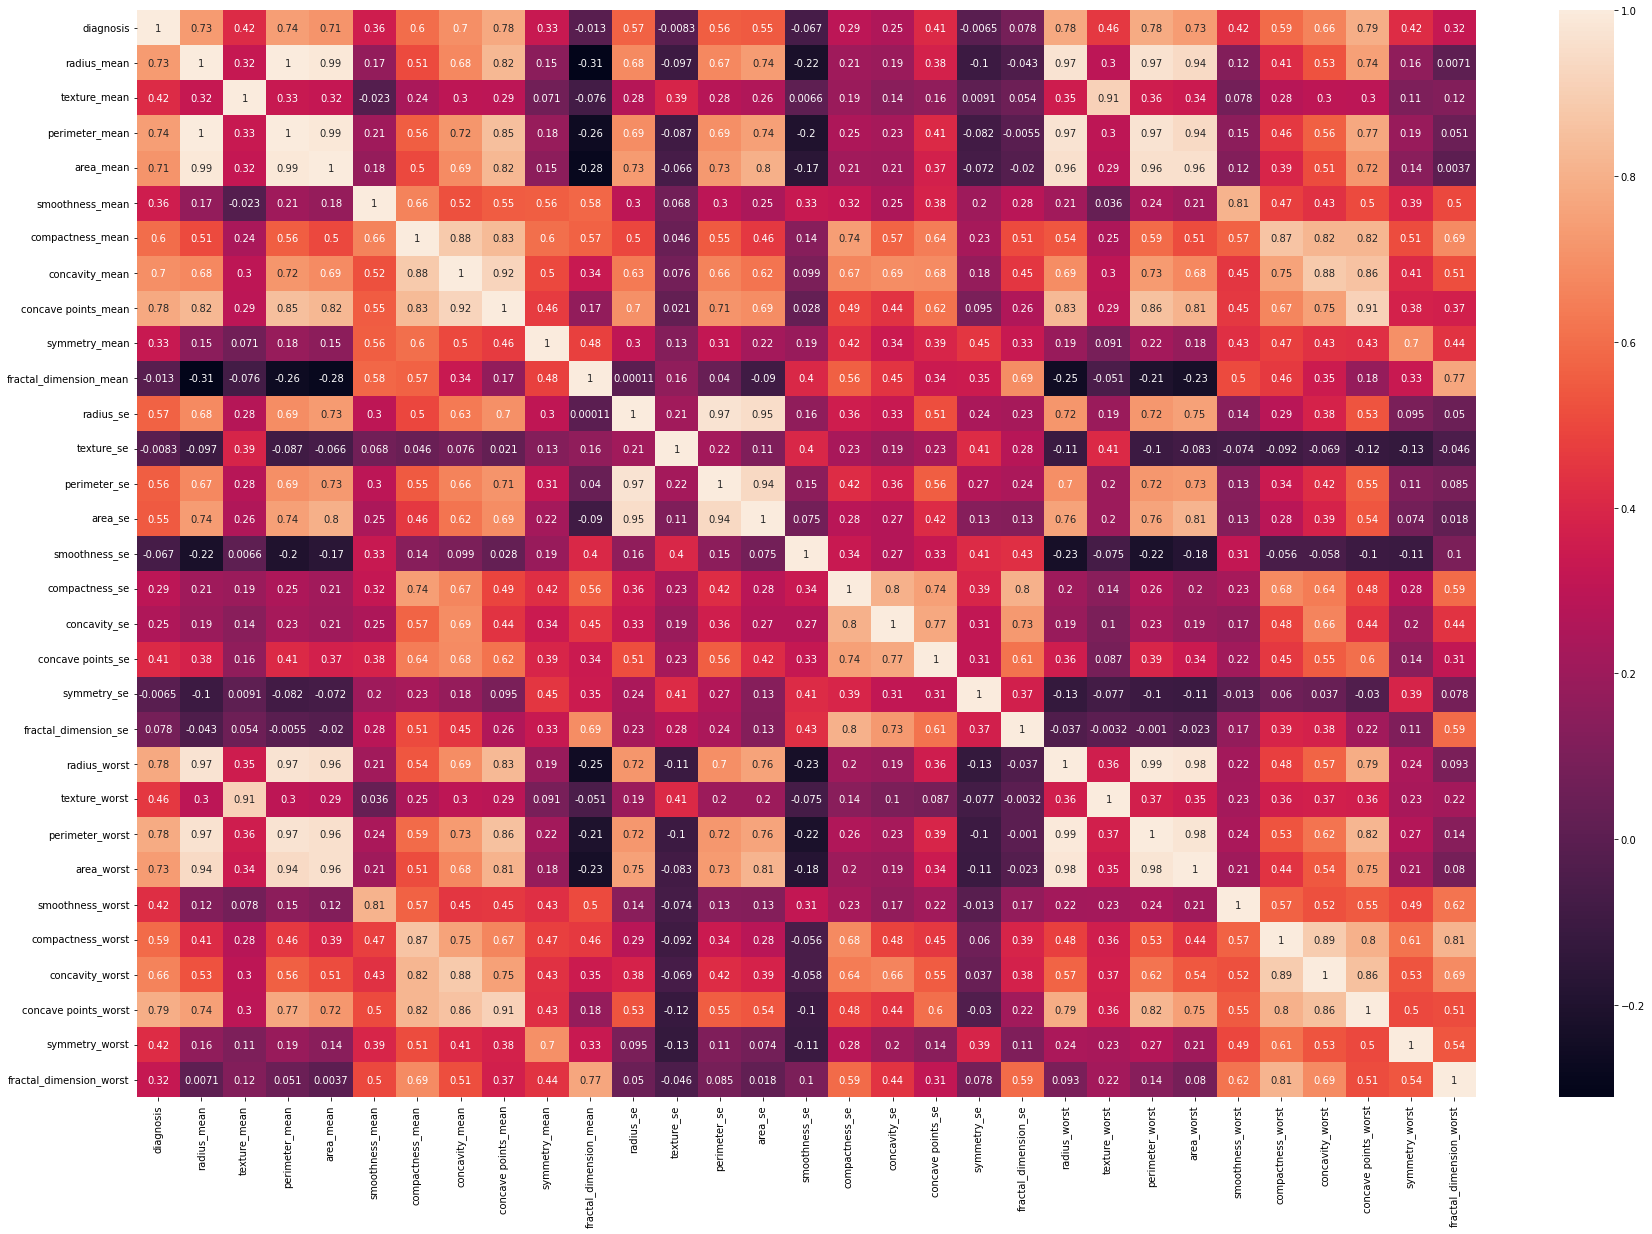

In [17]:
corr_matrix = data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True);

Dropping correlated columns: **perimeter_mean, radius_mean, perimeter_worst, radius_worst, perimeter_se, radius_se** 

In [18]:
correlated_columns = list({
        "perimeter_mean",
        "radius_mean",
        "perimeter_worst",
        "radius_worst",
        "perimeter_se",
        "radius_se"})
data = data.drop(columns=correlated_columns, axis=1)

In [19]:
data

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
X = data.drop(["diagnosis"], axis=1)
y = data["diagnosis"]

*Splitting the data into training and test sets*

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18,random_state=32)
print("Length of training set = ", len(X_train))
print("Length of test set = ", len(X_test))

Length of training set =  466
Length of test set =  103


*Standard Scaling*

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **KNN Classifier**

In [23]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_pred_knn, y_test)
scores = cross_val_score(model_knn, X_train, y_train, cv=5)
cv_score_knn = scores.mean()
print("Cross-val-score: ", cv_score_knn)
print("Accuracy score: ", accuracy_knn)

Cross-val-score:  0.9484328528940746
Accuracy score:  0.970873786407767


### **Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth = 5, min_samples_split=3)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = metrics.accuracy_score(y_pred_dt, y_test)
scores = cross_val_score(model_dt, X_train, y_train, cv=5)
cv_score_dt = scores.mean()
print("Cross-val-score: ", cv_score_dt)
print("Accuracy score: ", accuracy_dt)

Cross-val-score:  0.9270189887897506
Accuracy score:  0.8932038834951457


### **Random Forest Classifier** 

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model_rf = RandomForestClassifier(max_depth = 7, min_samples_split=5)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_pred_rf, y_test)
scores = cross_val_score(model_rf, X_train, y_train, cv=5)
cv_score_rf = scores.mean()
print("Cross-val-score: ", cv_score_rf)
print("Accuracy score: ", accuracy_rf)

Cross-val-score:  0.9592084191260583
Accuracy score:  0.9514563106796117


### **Stochastic Gradient Descent Classifier**

In [26]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
model_gd = SGDClassifier()
model_gd.fit(X_train, y_train)
y_pred_gd = model_dt.predict(X_test)
accuracy_gd = metrics.accuracy_score(y_pred_gd, y_test)
scores = cross_val_score(model_gd, X_train, y_train, cv=5)
cv_score_gd = scores.mean()
print("Cross-val-score: ", cv_score_gd)
print("Accuracy score: ", accuracy_gd)

Cross-val-score:  0.9570807595515902
Accuracy score:  0.8932038834951457


### **Logistic Regression**

In [27]:
model_logR = LogisticRegression()
model_logR.fit(X_train, y_train)
y_pred_logR = model_logR.predict(X_test)
accuracy_logR = metrics.accuracy_score(y_pred_logR, y_test)
scores = cross_val_score(model_logR, X_train, y_train, cv=5)
cv_score_logR = scores.mean()
print("Cross-val-score: ", cv_score_logR)
print("Accuracy score: ", accuracy_logR)

Cross-val-score:  0.9656600320292839
Accuracy score:  0.9805825242718447


### **AdaBoost Classifier**

In [28]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
accuracy_ada = metrics.accuracy_score(y_pred_ada, y_test)
scores = cross_val_score(model_ada, X_train, y_train, cv=5)
cv_score_ada = scores.mean()
print("Cross-val-score: ", cv_score_ada)
print("Accuracy score: ", accuracy_ada)

Cross-val-score:  0.9549302219171814
Accuracy score:  0.9611650485436893


In [29]:
print("Final accuracy of model = ", accuracy_logR * 100)

Final accuracy of model =  98.05825242718447


***Logistic Regression performs the best on our Dataset with 98.05% accuracy.***